## Introducción al Procesamiento de Lenguaje Natural


- Fundamentos de PLN.

- Preprocesamiento de texto.

# Punto 1

1. Importar y leer la base de tweets:  *tweets_politica.csv*

In [153]:
import pandas as pd

In [154]:
data= pd.read_csv("tweets_politica.csv", sep='::::')

c:\Users\bizan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\util\_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



In [155]:
data

,cuenta,partido,timestamp,tweet
0,populares,pp,1.556863e+09,El Partido Popular siempre con la libertad. Ta...
1,populares,pp,1.556856e+09,🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...
2,populares,pp,1.556819e+09,📻 @IdiazAyuso: “Con @populares hemos convertid...
3,populares,pp,1.556813e+09,📻 @IdiazAyuso es entrevistada en @encasadeherr...
4,populares,pp,1.556804e+09,"👉 Como prometimos, @populares acaba con el enc..."
...,...,...,...,...
175337,Borja_AlvaCs,ciudadanos,1.648710e+09,El trabajo serio y valiente que está realizand...
175338,Borja_AlvaCs,ciudadanos,1.648700e+09,"Luz de luna, Cita a ciegas, La jungla y mucho ..."
175339,DanielPerezCs,ciudadanos,1.648699e+09,@InCicloVeritas @Fundeu Cervantes en este caso...
175340,DanielPerezCs,ciudadanos,1.648657e+09,@InCicloVeritas No es la app; es la @Fundeu. P...


In [156]:
data.head()

,cuenta,partido,timestamp,tweet
0,populares,pp,1.556863e+09,El Partido Popular siempre con la libertad. Ta...
1,populares,pp,1.556856e+09,🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...
2,populares,pp,1.556819e+09,📻 @IdiazAyuso: “Con @populares hemos convertid...
3,populares,pp,1.556813e+09,📻 @IdiazAyuso es entrevistada en @encasadeherr...
4,populares,pp,1.556804e+09,"👉 Como prometimos, @populares acaba con el enc..."


2. Agregar al data.frame que se obtiene una columna que cuente las palabras de cada tweet.


In [157]:
data.iloc[:,3]

0         El Partido Popular siempre con la libertad. Ta...
1         🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...
2         📻 @IdiazAyuso: “Con @populares hemos convertid...
3         📻 @IdiazAyuso es entrevistada en @encasadeherr...
4         👉 Como prometimos, @populares acaba con el enc...
                                ...                        
175337    El trabajo serio y valiente que está realizand...
175338    Luz de luna, Cita a ciegas, La jungla y mucho ...
175339    @InCicloVeritas @Fundeu Cervantes en este caso...
175340    @InCicloVeritas No es la app; es la @Fundeu. P...
175341    "España ha cumplido; cumpla usted con España"....
Name: tweet, Length: 175342, dtype: object

In [158]:
data['conteo'] = data.tweet.apply(lambda x: len(str(x).split()))

In [159]:
data

,cuenta,partido,timestamp,tweet,conteo
0,populares,pp,1.556863e+09,El Partido Popular siempre con la libertad. Ta...,12
1,populares,pp,1.556856e+09,🌞 ¡Buenos días y #FelizViernes!Esta es nuestra...,15
2,populares,pp,1.556819e+09,📻 @IdiazAyuso: “Con @populares hemos convertid...,25
3,populares,pp,1.556813e+09,📻 @IdiazAyuso es entrevistada en @encasadeherr...,15
4,populares,pp,1.556804e+09,"👉 Como prometimos, @populares acaba con el enc...",19
...,...,...,...,...,...
175337,Borja_AlvaCs,ciudadanos,1.648710e+09,El trabajo serio y valiente que está realizand...,42
175338,Borja_AlvaCs,ciudadanos,1.648700e+09,"Luz de luna, Cita a ciegas, La jungla y mucho ...",26
175339,DanielPerezCs,ciudadanos,1.648699e+09,@InCicloVeritas @Fundeu Cervantes en este caso...,11
175340,DanielPerezCs,ciudadanos,1.648657e+09,@InCicloVeritas No es la app; es la @Fundeu. P...,20


3. Tomar las primeras 500 filas de la variable ":tweet" y dar respuesta a los siguientes items.
    
    
     + Realice una tabla de frecuencia, un gráfico de barras y un gráfico de líneas del top 20 de las personas que más publican. Analizar los gráficos y responder: ¿cuáles son las 5 cuentas que más tweets  o son más populares en ese conjunto de los 500 datos?

In [160]:
!pip install wordcloud
!pip install stop-words


In [161]:
pip install plotly==5.13.1

Note: you may need to restart the kernel to use updated packages.


In [162]:
# importamos e instalamos algunas librerías que se requieren
import numpy as np 
import plotly.express as px
from wordcloud import WordCloud, ImageColorGenerator
from stop_words import get_stop_words


+ Realice una tabla de frecuencia, un gráfico de barras y un gráfico de líneas del top 20 de las personas que más publican. Analizar los gráficos y responder: ¿cuáles son las 5 cuentas que más tweets  o son más populares en ese conjunto de los 500 datos?


In [163]:
frecuencias = {}
for palabra in data.cuenta[:500]:
    if palabra in frecuencias:
        frecuencias[palabra] += 1
    else:
        frecuencias[palabra] = 1
print(frecuencias)


{'populares': 112, 'PSOE': 94, 'CiudadanosCs': 123, 'ahorapodemos': 107, 'pablocasado_': 64}


In [164]:
df = pd.DataFrame([[key, frecuencias[key]]
                  for key in frecuencias.keys()], columns=['Palabra', 'Frecuencia'])
top20 = df.sort_values(["Frecuencia"], ascending=False)[:20]
top20


,Palabra,Frecuencia
2,CiudadanosCs,123
0,populares,112
3,ahorapodemos,107
1,PSOE,94
4,pablocasado_,64


In [165]:
fig = px.bar(x=top20["Palabra"], y=top20["Frecuencia"])

fig.update_layout(
    yaxis_title='frecuencia',  # label eje x
    xaxis_title="Autores",  # label eje y
    title="Gráfico de Barras top 20 tweets "  # label título
)


In [166]:
fig_lineas = px.line(x=top20["Palabra"], y=top20["Frecuencia"])

fig_lineas.update_layout(
    yaxis_title='frecuencia',  # label eje x
    xaxis_title="Autores",  # label eje y
    title="Gráfico de lineas top 20 tweets "  # label título
)
fig_lineas.show()


Las primeras 5 cuentas en los primeros 500 tweets del data frame son CiudadanosCs, populares, ahorapodemos, PSOE, pablocasado_

 + Repita el punto anterior con la totalidad de los tweets y graficando el top 20.

In [167]:
frecuencias={}
for palabra in data.cuenta:
    if palabra in frecuencias:
        frecuencias[palabra]+=1
    else:
        frecuencias[palabra]=1
print(frecuencias) 

{'populares': 11397, 'PSOE': 15678, 'CiudadanosCs': 9191, 'ahorapodemos': 2077, 'pablocasado_': 2961, 'sanchezcastejon': 3072, 'Albert_Rivera': 916, 'Pablo_Iglesias_': 1123, 'TeoGarciaEgea': 1559, 'carmencalvo_': 1084, 'InesArrimadas': 2374, 'Irene_Montero_': 463, 'JavierMaroto': 453, 'ALevySoler': 1598, 'IdiazAyuso': 1988, 'cucagamarra': 1029, 'gonzalezpons': 1617, 'zoidoJI': 866, 'DolorsMM': 903, 'CristinaNarbona': 782, 'Adrilastra': 637, 'abalosmeco': 1069, 'patxilopez': 293, 'oscar_puente_': 4936, 'BeatrizCorredor': 1177, 'odonelorza2011': 2878, 'CiudadanoVille': 180, 'FranHervias': 530, 'ferdeparamo': 17, 'GirautaOficial': 1582, 'begonavillacis': 1823, 'MelisaRguezCs': 527, 'Tonicanto1': 3822, 'TeresaRodr_': 1175, 'JM_Kichi': 811, 'Alber_Canarias': 321, 'MayoralRafa': 569, 'ionebelarra': 2067, 'MiguelUrban': 3029, 'pnique': 1147, 'VeraNoelia': 326, 'vox_es': 4402, 'Santi_ABASCAL': 1807, 'Ortega_Smith': 1272, 'monasterioR': 1669, 'Jorgebuxade': 5917, 'ivanedlm': 3269, 'Igarrigavaz'

In [168]:
df = pd.DataFrame([[key, frecuencias[key]] for key in frecuencias.keys()], columns=['Palabra', 'Frecuencia'])
top20=df.sort_values(["Frecuencia"], ascending=False)[:20]
top20

,Palabra,Frecuencia
1,PSOE,15678
0,populares,11397
2,CiudadanosCs,9191
103,hermanntertsch,6933
45,Jorgebuxade,5917
95,PODEMOS,5393
23,oscar_puente_,4936
41,vox_es,4402
32,Tonicanto1,3822
46,ivanedlm,3269


In [169]:

fig = px.bar(x=top20["Palabra"], y=top20["Frecuencia"])

fig.update_layout(
    yaxis_title='frecuencia', # label eje x
    xaxis_title = "Autores", # label eje y
    title = "Gráfico de Barras top 20 tweets " # label título 
)

In [170]:
fig_lineas = px.line(x=top20["Palabra"], y=top20["Frecuencia"])

fig_lineas.update_layout(
    yaxis_title='frecuencia', # label eje x
    xaxis_title = "Autores", # label eje y
    title = "Gráfico de lineas top 20 tweets " # label título 
)
fig_lineas.show()

Las 5 cuentas que mas tweetean son PSOE, populares, CiudadanosCs, hermanntertsch y Jordebuxade. Tal como se puede apreciar en las dos graficas y tabla de frecuencias.

En relación con el item anterior se identifica que analizando todos los tweets, PSOE subio a ser el primer autor con mas tweets, populares se mantiene en el segundo lugar, CiudadanosCs baja al tercer lugar, ahorapodemos pasa al puesto 20 y pablocasado no esta en el top 20 de las personas que mas publican.

+ Haga una nube de palabras donde se muestre el hashtag más posteado en los 500 tweets. ¿Cuántas veces fue posteado en los 500 tweets y en la base total?

In [171]:
import re
def hashtags(tweet) -> list[str]:
    return re.findall(r'#\w+', tweet)

In [172]:
frecuencias = {}
for tweet in data[:500]["tweet"]:
    for hashtag in hashtags(tweet):
        frecuencias[hashtag] = frecuencias.get(hashtag, 0) + 1
        
print(frecuencias)

{'#LibertadDePrensa': 3, '#FelizViernes': 1, '#2DeMayo': 3, '#2deMayo': 4, '#TejerinaEnOndaCero': 2, '#TejerinaEnOndaCeroSíguela': 1, '#EsHerrero': 2, '#28A': 24, '#España': 7, '#ÚLTIMAHORA': 1, '#EleccionesGenerales28A': 16, '#MásPPMásEspaña': 7, '#VotaPP': 36, '#ElVotoQueNosUne': 15, '#ValorSeguro': 31, '#ElVotoSeUne': 3, '#FinCampañaESP': 5, '#CasadoConFJL': 3, '#CMIN': 1, '#DíaConvenciónDiscapacidadRecordar': 1, '#PGE2019': 1, '#LosDesayunos': 6, '#AcosoEscolar': 1, '#StopBullying': 2, '#140AñosPSOE': 16, '#estabilidad': 1, '#progreso': 1, '#igualdad': 2, '#PSOE': 21, '#140añosPSOE': 2, '#ComunidadDeMadrid': 1, '#2demayo': 3, '#libertad': 1, '#justiciasocial': 1, '#140AniversarioPSOE': 1, '#1demayo': 5, '#DíadelTrabajador': 1, '#Madrid': 1, '#derechossociales': 2, '#derechoslaborales': 2, '#PrimeroLasPersonas': 4, '#DíadelTrabajo': 3, '#DiaDelTrabajador': 2, '#1Mayo': 2, '#CMin': 5, '#28ALa': 1, '#HicisteisQuePasara': 37, '#26M': 4, '#PP': 1, '#Cs': 1, '#EnDirecto': 4, '#Ferraz': 3

In [173]:
df = pd.DataFrame([[key, frecuencias[key]]
                  for key in frecuencias.keys()], columns=['tweet', 'Frecuencia'])
df.head(20) #Para observar que sirve vamos a ver 20 


,tweet,Frecuencia
0,#LibertadDePrensa,3
1,#FelizViernes,1
2,#2DeMayo,3
3,#2deMayo,4
4,#TejerinaEnOndaCero,2
5,#TejerinaEnOndaCeroSíguela,1
6,#EsHerrero,2
7,#28A,24
8,#España,7
9,#ÚLTIMAHORA,1


In [174]:
import matplotlib.pyplot as plt


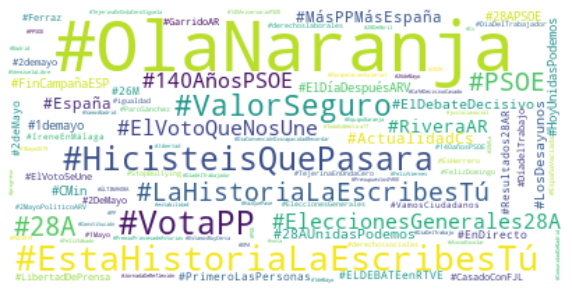

In [175]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(frecuencias)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [176]:
# Guarde la imagen en .png o .jpg para y cárguela en la carpeta
wordcloud.to_image().save("NubeDePalabras.png")

 +¿Se puede cambiar la forma de la nube de palabras a una imagen personalizada?

Si, se puede personalizar la imagen para hacer la nube de palabras, usando la opción mask.

# PUNTO 2

In [177]:
import nltk
from nltk.corpus import stopwords
import itertools
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bizan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bizan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bizan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

#### Pasamos a minusculas el texto

In [178]:
# Pasamos a minusculas el texto
text_GGM=open("Cien_años_GGM.txt",encoding="utf-8")
text_GGM=text_GGM.read()

In [179]:
# item 2
words = nltk.word_tokenize(text_GGM)
sents = nltk.sent_tokenize(text_GGM)
print("El numero de palabras que tiene el fracmento del texto es de: ", len(words))
print("El numero de oraciones que tiene el fracmento del texto es de: ", len(sents))


El numero de palabras que tiene el fracmento del texto es de:  4306
El numero de oraciones que tiene el fracmento del texto es de:  133


### Preprocesamiento de texto

#### Pasamos a minusculas el texto

In [180]:
# Pasamos a minusculas el texto
text_GGM_low = text_GGM.lower()
print(text_GGM_low)


gabriel garcía márquez 



cien años de soledad 



editado por "ediciones la cueva" 



para j omi garcía ascot 
y maría luisa elio 



cien años de soledad 



gabriel garcía márquez 



muchos años después, frente al pelotón de fusilamiento, el coronel aureliano buendía había de 
recordar aquella tarde remota en que su padre lo llevó a conocer el hielo. macondo era entonces 
una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas 
que se precipitaban por un lecho de piedras pulidas, blancas y enormes como huevos 
prehistóricos. el mundo era tan reciente, que muchas cosas carecían de nombre, y para 
mencionarlas había que señalarías con el dedo. todos los años, por el mes de marzo, una familia 
de gitanos desarrapados plantaba su carpa cerca de la aldea, y con un grande alboroto de pitos y 
timbales daban a conocer los nuevos inventos. primero llevaron el imán. un gitano corpulento, de 
barba montaraz y manos de gorrión, que se presentó con 

#### conservamos solo palabras

In [181]:
# conservamos solo palabras
text_no_esp = re.compile(r'\W+', re.UNICODE).split(text_GGM_low)
text_no_esp = ' '.join(text_no_esp)
text_no_esp


'gabriel garcía márquez cien años de soledad editado por ediciones la cueva para j omi garcía ascot y maría luisa elio cien años de soledad gabriel garcía márquez muchos años después frente al pelotón de fusilamiento el coronel aureliano buendía había de recordar aquella tarde remota en que su padre lo llevó a conocer el hielo macondo era entonces una aldea de veinte casas de barro y cañabrava construidas a la orilla de un río de aguas diáfanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistóricos el mundo era tan reciente que muchas cosas carecían de nombre y para mencionarlas había que señalarías con el dedo todos los años por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos primero llevaron el imán un gitano corpulento de barba montaraz y manos de gorrión que se presentó con el nombre de melquíades hizo una truculenta demos

#### Funcion para quitar tildes del texto en minuscula

In [182]:
from unidecode import unidecode

# funcion para quitar tildes del texto en minuscula
def remove_tildes(s):
    return unidecode(s)



#removemos las tildes del texto de Gabo
text_no_tildes = remove_tildes(text_no_esp)
print(text_no_tildes)


gabriel garcia marquez cien anos de soledad editado por ediciones la cueva para j omi garcia ascot y maria luisa elio cien anos de soledad gabriel garcia marquez muchos anos despues frente al peloton de fusilamiento el coronel aureliano buendia habia de recordar aquella tarde remota en que su padre lo llevo a conocer el hielo macondo era entonces una aldea de veinte casas de barro y canabrava construidas a la orilla de un rio de aguas diafanas que se precipitaban por un lecho de piedras pulidas blancas y enormes como huevos prehistoricos el mundo era tan reciente que muchas cosas carecian de nombre y para mencionarlas habia que senalarias con el dedo todos los anos por el mes de marzo una familia de gitanos desarrapados plantaba su carpa cerca de la aldea y con un grande alboroto de pitos y timbales daban a conocer los nuevos inventos primero llevaron el iman un gitano corpulento de barba montaraz y manos de gorrion que se presento con el nombre de melquiades hizo una truculenta demost

#### Tokenizamos

In [183]:
# hacemos una tokenizacion artesanal
tokens = text_no_tildes.split()
tokens


['gabriel',
 'garcia',
 'marquez',
 'cien',
 'anos',
 'de',
 'soledad',
 'editado',
 'por',
 'ediciones',
 'la',
 'cueva',
 'para',
 'j',
 'omi',
 'garcia',
 'ascot',
 'y',
 'maria',
 'luisa',
 'elio',
 'cien',
 'anos',
 'de',
 'soledad',
 'gabriel',
 'garcia',
 'marquez',
 'muchos',
 'anos',
 'despues',
 'frente',
 'al',
 'peloton',
 'de',
 'fusilamiento',
 'el',
 'coronel',
 'aureliano',
 'buendia',
 'habia',
 'de',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'en',
 'que',
 'su',
 'padre',
 'lo',
 'llevo',
 'a',
 'conocer',
 'el',
 'hielo',
 'macondo',
 'era',
 'entonces',
 'una',
 'aldea',
 'de',
 'veinte',
 'casas',
 'de',
 'barro',
 'y',
 'canabrava',
 'construidas',
 'a',
 'la',
 'orilla',
 'de',
 'un',
 'rio',
 'de',
 'aguas',
 'diafanas',
 'que',
 'se',
 'precipitaban',
 'por',
 'un',
 'lecho',
 'de',
 'piedras',
 'pulidas',
 'blancas',
 'y',
 'enormes',
 'como',
 'huevos',
 'prehistoricos',
 'el',
 'mundo',
 'era',
 'tan',
 'reciente',
 'que',
 'muchas',
 'cosas',
 'carecia

In [184]:
# quitamos las tildes de las stop words mara que hagan match con el texto
stop_w = ' '.join(stopwords.words('spanish'))
stop_w = remove_tildes(stop_w)
stop_w = stop_w.split()

# eliminamos las stop words
for n in stop_w:
    for m in tokens:
        if n == m:
            tokens.remove(n)

# miramos las frecuencias de las palabras
frecuencias = {}
for palabra in tokens:
    if palabra in frecuencias:
        frecuencias[palabra] += 1
    else:
        frecuencias[palabra] = 1

# Ordenamos el diccionario
frec_sort = dict(sorted(frecuencias.items(), key=lambda item: item[1],
                        reverse=True))

# mostramos los diez primeros valores
res = dict(itertools.islice(frec_sort.items(), 10))
print("Las 10 palabras mas usadas son: \n", list(res.keys()))


Las 10 palabras mas usadas son: 
 ['buendia', 'jose', 'arcadio', 'melquiades', 'anos', 'ursula', 'aldea', 'casa', 'aquel', 'aquella']


#### Tagging

In [185]:
# tagging sobre todo el texto en minusculas
nltk.pos_tag(tokens)


[('gabriel', 'NN'),
 ('garcia', 'NN'),
 ('marquez', 'NN'),
 ('cien', 'NN'),
 ('anos', 'NNS'),
 ('soledad', 'VBP'),
 ('editado', 'JJ'),
 ('ediciones', 'NNS'),
 ('cueva', 'VBP'),
 ('j', 'NN'),
 ('omi', 'NN'),
 ('garcia', 'NN'),
 ('ascot', 'NN'),
 ('maria', 'NN'),
 ('luisa', 'NN'),
 ('elio', 'NN'),
 ('cien', 'NN'),
 ('anos', 'NNS'),
 ('soledad', 'VBP'),
 ('gabriel', 'JJ'),
 ('garcia', 'NN'),
 ('marquez', 'NN'),
 ('anos', 'NN'),
 ('despues', 'NNS'),
 ('frente', 'VBP'),
 ('peloton', 'NN'),
 ('fusilamiento', 'NN'),
 ('coronel', 'NN'),
 ('aureliano', 'NN'),
 ('buendia', 'NN'),
 ('recordar', 'NN'),
 ('aquella', 'NN'),
 ('tarde', 'NN'),
 ('remota', 'NN'),
 ('padre', 'NN'),
 ('llevo', 'JJ'),
 ('conocer', 'NN'),
 ('hielo', 'NN'),
 ('macondo', 'NN'),
 ('entonces', 'NNS'),
 ('aldea', 'VBP'),
 ('veinte', 'JJ'),
 ('casas', 'NN'),
 ('barro', 'NN'),
 ('canabrava', 'NN'),
 ('construidas', 'NN'),
 ('orilla', 'NN'),
 ('rio', 'NN'),
 ('aguas', 'IN'),
 ('diafanas', 'JJ'),
 ('precipitaban', 'NN'),
 ('lecho',

# Punto 3

1. Escoger una página web que contenga texto (noticias, articulo, cuento, historia, etc.)


2. Utilizar la librería BeautifulSoup para leer el texto HTML

3. Hacer preprocesamiento de la información de la página web.



In [186]:
from bs4 import BeautifulSoup
from urllib.request import urlopen


In [187]:
from urllib.request import urlopen
pagina = urlopen("https://es.uefa.com/uefachampionsleague/")
CodHTML=pagina.read().decode("utf-8")


In [188]:
from bs4 import BeautifulSoup
CodHTMLclean = BeautifulSoup(CodHTML).get_text()


In [189]:
tokens = nltk.word_tokenize(CodHTMLclean)


In [190]:
CodHTMLclean=re.split('\W+',CodHTML) 
CodHTMLclean= ' '.join(CodHTMLclean)
CodHTMLclean=CodHTMLclean.lower()

##### Removemos caracteres especiales

In [191]:
CodHTMLclean = re.compile(r'\W+', re.UNICODE).split(CodHTMLclean)
CodHTMLclean


['',
 'doctype',
 'html',
 'html',
 'lang',
 'es',
 'data',
 'lang',
 'es',
 'data',
 'culture',
 'es',
 'es',
 'head',
 'prefix',
 'og',
 'http',
 'ogp',
 'me',
 'ns',
 'fb',
 'http',
 'ogp',
 'me',
 'ns',
 'fb',
 'website',
 'http',
 'ogp',
 'me',
 'ns',
 'website',
 'title',
 'uefa',
 'champions',
 'league',
 'uefa',
 'com',
 'title',
 'meta',
 'http',
 'equiv',
 'x',
 'ua',
 'compatible',
 'content',
 'ie',
 'edge',
 'meta',
 'http',
 'equiv',
 'content',
 'type',
 'content',
 'text',
 'html',
 'charset',
 'utf',
 '8',
 'meta',
 'charset',
 'utf',
 '8',
 'meta',
 'name',
 'description',
 'content',
 'la',
 'p',
 'xe1',
 'gina',
 'oficial',
 'de',
 'la',
 'competici',
 'xf3',
 'n',
 'de',
 'clubes',
 'm',
 'xe1',
 's',
 'prestigiosa',
 'del',
 'mundo',
 'accede',
 'a',
 'noticias',
 'estad',
 'xed',
 'sticas',
 'y',
 'v',
 'xed',
 'deos',
 'y',
 'juega',
 'al',
 'fantasy',
 'y',
 'la',
 'quiniela',
 'meta',
 'name',
 'author',
 'content',
 'uefa',
 'com',
 'meta',
 'name',
 'handhel

##### Quitamos tildes

In [192]:
CodHTMLclean=[remove_tildes(x) for x in CodHTMLclean]

In [193]:
CodHTMLclean

['',
 'doctype',
 'html',
 'html',
 'lang',
 'es',
 'data',
 'lang',
 'es',
 'data',
 'culture',
 'es',
 'es',
 'head',
 'prefix',
 'og',
 'http',
 'ogp',
 'me',
 'ns',
 'fb',
 'http',
 'ogp',
 'me',
 'ns',
 'fb',
 'website',
 'http',
 'ogp',
 'me',
 'ns',
 'website',
 'title',
 'uefa',
 'champions',
 'league',
 'uefa',
 'com',
 'title',
 'meta',
 'http',
 'equiv',
 'x',
 'ua',
 'compatible',
 'content',
 'ie',
 'edge',
 'meta',
 'http',
 'equiv',
 'content',
 'type',
 'content',
 'text',
 'html',
 'charset',
 'utf',
 '8',
 'meta',
 'charset',
 'utf',
 '8',
 'meta',
 'name',
 'description',
 'content',
 'la',
 'p',
 'xe1',
 'gina',
 'oficial',
 'de',
 'la',
 'competici',
 'xf3',
 'n',
 'de',
 'clubes',
 'm',
 'xe1',
 's',
 'prestigiosa',
 'del',
 'mundo',
 'accede',
 'a',
 'noticias',
 'estad',
 'xed',
 'sticas',
 'y',
 'v',
 'xed',
 'deos',
 'y',
 'juega',
 'al',
 'fantasy',
 'y',
 'la',
 'quiniela',
 'meta',
 'name',
 'author',
 'content',
 'uefa',
 'com',
 'meta',
 'name',
 'handhel

##### Quitamos stop words y tokenizamos

In [194]:
stop_w = ' '.join(stopwords.words('spanish'))
stop_w = remove_tildes(stop_w)
stop_w = stop_w.split()

# eliminamos las stop words
for n in stop_w:
    for m in CodHTMLclean:
        if n == m:
            CodHTMLclean.remove(n)
CodHTMLclean



['',
 'doctype',
 'html',
 'html',
 'lang',
 'data',
 'lang',
 'data',
 'culture',
 'head',
 'prefix',
 'og',
 'http',
 'ogp',
 'ns',
 'fb',
 'http',
 'ogp',
 'ns',
 'fb',
 'website',
 'http',
 'ogp',
 'ns',
 'website',
 'title',
 'uefa',
 'champions',
 'league',
 'uefa',
 'com',
 'title',
 'meta',
 'http',
 'equiv',
 'x',
 'ua',
 'compatible',
 'content',
 'ie',
 'edge',
 'meta',
 'http',
 'equiv',
 'content',
 'type',
 'content',
 'text',
 'html',
 'charset',
 'utf',
 '8',
 'meta',
 'charset',
 'utf',
 '8',
 'meta',
 'name',
 'description',
 'content',
 'p',
 'xe1',
 'gina',
 'oficial',
 'competici',
 'xf3',
 'n',
 'clubes',
 'm',
 'xe1',
 's',
 'prestigiosa',
 'mundo',
 'accede',
 'noticias',
 'xed',
 'sticas',
 'v',
 'xed',
 'deos',
 'juega',
 'fantasy',
 'quiniela',
 'meta',
 'name',
 'author',
 'content',
 'uefa',
 'com',
 'meta',
 'name',
 'handheldfriendly',
 'content',
 'true',
 'meta',
 'name',
 'mobileoptimized',
 'content',
 '320',
 'meta',
 'name',
 'application',
 'name',

4. Describir en una nube de palabras lo que está en la página web.

In [195]:
Freq_dist_nltk=nltk.FreqDist(tokens[1000:2000]) ; Freq_dist_nltk

FreqDist({'de': 20, 'UEFA': 8, 'En': 7, 'directo': 7, 'la': 7, 'y': 7, '.': 5, 'en': 3, 'El': 3, 'el': 3, ...})

In [196]:
stop_words = get_stop_words("es")
print(stop_words[0:10])


['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'contra']


In [197]:
tokensclean=[palabras for palabras in tokens[1000:2000] if len(palabras.lower())>1 and (palabras.lower() not in stop_words)]

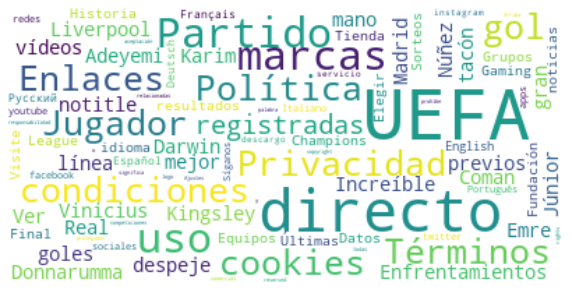

In [198]:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white").generate(" ".join(tokensclean))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


Como se observa en la nube de palabras las palabras mas representativas son UEFA, Partido, marc as, directo, uso, Política, Jugador y tiene mucho sentido con la pagina web estas y el resto de palabtras en la wordcloud realizada.

# Punto 4

**Nota:** se debe tener en cuenta la funcion que remueve las tildes, ya que las stop words vienen algunas con tildes y se llama dos veces dentro de la funcion de preprocesamiento, si es olbligatorio quietarla se puede, pero no respetaria las buenas practicas de programacion. 

In [199]:
# funcion para quitar tildes del texto en minuscula
def remove_tildes(s):
    return unidecode(s)


def pre_procesamiento(texto):
    
    new_text = texto.lower()  # pasamos a minusculas
    new_text = re.compile(r'\W+', re.UNICODE).split(new_text)  # removemos caracteres especiales
    new_text = ' '.join(new_text)
    new_text = remove_tildes(new_text)                      # removemos tildes
    new_text = new_text.split()                                   # tokenizamos
    stop_w = ' '.join(stopwords.words('spanish'))
    stop_w = remove_tildes(stop_w)
    stop_w = stop_w.split()  # eliminamos las stop words
    
    for n in stop_w:
        for m in new_text:
            if n == m:
                new_text.remove(n)
    return new_text


pre_procesamiento(text_GGM)


['gabriel',
 'garcia',
 'marquez',
 'cien',
 'anos',
 'soledad',
 'editado',
 'ediciones',
 'cueva',
 'j',
 'omi',
 'garcia',
 'ascot',
 'maria',
 'luisa',
 'elio',
 'cien',
 'anos',
 'soledad',
 'gabriel',
 'garcia',
 'marquez',
 'anos',
 'despues',
 'frente',
 'peloton',
 'fusilamiento',
 'coronel',
 'aureliano',
 'buendia',
 'recordar',
 'aquella',
 'tarde',
 'remota',
 'padre',
 'llevo',
 'conocer',
 'hielo',
 'macondo',
 'entonces',
 'aldea',
 'veinte',
 'casas',
 'barro',
 'canabrava',
 'construidas',
 'orilla',
 'rio',
 'aguas',
 'diafanas',
 'precipitaban',
 'lecho',
 'piedras',
 'pulidas',
 'blancas',
 'enormes',
 'huevos',
 'prehistoricos',
 'mundo',
 'tan',
 'reciente',
 'muchas',
 'cosas',
 'carecian',
 'nombre',
 'mencionarlas',
 'senalarias',
 'dedo',
 'anos',
 'mes',
 'marzo',
 'familia',
 'gitanos',
 'desarrapados',
 'plantaba',
 'carpa',
 'cerca',
 'aldea',
 'grande',
 'alboroto',
 'pitos',
 'timbales',
 'daban',
 'conocer',
 'nuevos',
 'inventos',
 'primero',
 'llevar